In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/ex1data1.txt', header=None,sep=",")

In [3]:
dataset.columns = ['population','profit']

In [4]:
dataset.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


# Plotting Data

In [5]:
X = dataset.iloc[:,0].values
y = dataset.iloc[:,1].values

In [6]:
#convert rank1 arrays to rank2
X = X[:,np.newaxis]
y = y[:,np.newaxis]

Text(0.5, 1.0, 'Profit Vs Population')

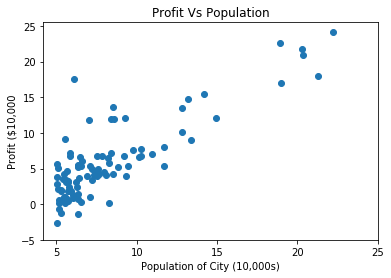

In [7]:
plt.scatter(X,y)
plt.xticks(np.arange(5,30,step=5))
plt.yticks(np.arange(-5,30,step=5))
plt.xlabel("Population of City (10,000s)")
plt.ylabel("Profit ($10,000")
plt.title("Profit Vs Population")

# Create cost function J(Theta)

In [8]:
#add a column of ones to X
ones = np.ones(shape=(len(y),1))

In [9]:
X = np.hstack((ones,X))

In [10]:
#initialize theta as 2x1 zeros vector for initialy
theta = np.zeros(shape=(2,1))

In [11]:
#h(x)= theta0 + theta1*X
def getCost(X,y,theta):
    m = len(y)
    predictions = np.dot(X,theta)
    squared_error = (predictions-y)**2
    cost = np.sum(squared_error)/(2*m)
    return cost

In [12]:
costval = getCost(X,y,theta)
print("Cost function value for theta zeros : {}".format(costval))

Cost function value for theta zeros : 32.072733877455676


# Finding optimal Value using Gradient Descent

In [23]:
history = []
def gradientDescent(X,y,theta):
    alpha = 0.01
    iterations = 1500
    n = len(y)
    for i in range(iterations):
        prediction = np.dot(X,theta)
        error = prediction - y
        grad = np.dot(X.T,error)
        theta = theta - (alpha/n)*grad
        co = getCost(X,y,theta)
        history.append(co)
    return theta

In [24]:
thetas = gradientDescent(X,y,theta)
thetas

array([[-3.63029144],
       [ 1.16636235]])

# Plot Cost function over iteration

Text(0.5, 1.0, 'Cost function using Gradient Descent')

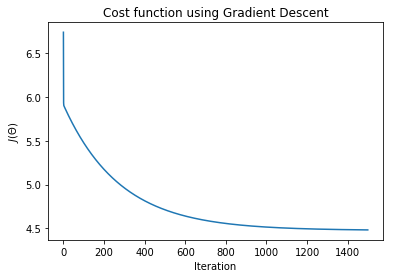

In [25]:
plt.plot(history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

# 3D Plot
eg - https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html

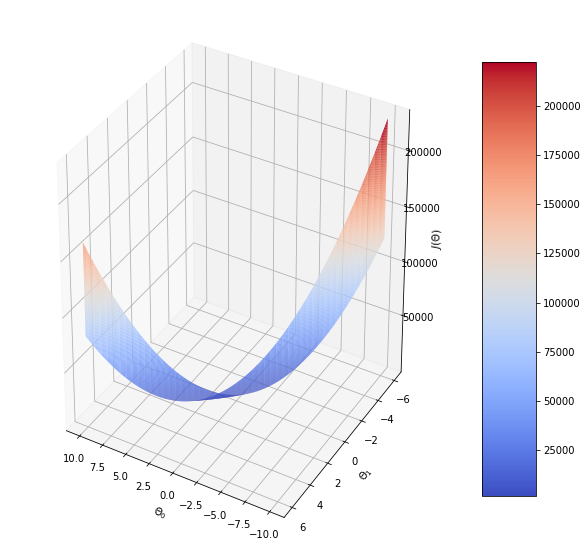

In [40]:
from mpl_toolkits.mplot3d import Axes3D
#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-6,6,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=getCost(X,y,t)
#Generating the surface plot
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.8, aspect=8)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")
#rotate for better angle
ax.view_init(30,120)

<h3> cost function is a convex function which only has 1 global minimum, hence, gradient descent would always result in finding the global minimum</h3